# *pyopencga* Basic Variant and Interpretation Usage

------


**[NOTE]** The server methods used by pyopencga client are defined in the following swagger URL:
- https://ws.opencb.org/opencga-prod/webservices

**[NOTE]** Current implemented methods are registered at the following spreadsheet:
- https://docs.google.com/spreadsheets/d/1QpU9yl3UTneqwRqFX_WAqCiCfZBk5eU-4E3K-WVvuoc/edit?usp=sharing

## Overview

add here

## 1. Setup the Client and Login into *pyopencga* 

**Configuration and Credentials** 

Let's assume we already have *pyopencga* installed in our python setup (all the steps described on [001-pyopencga_first_steps.ipynb](https://github.com/opencb/opencga/tree/develop/opencga-client/src/main/python/notebooks/user-training)).

You need to provide **at least** a host server URL in the standard configuration format for OpenCGA as a python dictionary or in a json file.


In [24]:
from pyopencga.opencga_config import ClientConfiguration # import configuration module
from pyopencga.opencga_client import OpencgaClient # import client module
from pprint import pprint
import json
import matplotlib.pyplot as plt
import seaborn as sns

####################################
## Configuration parameters  #######
####################################
# OpenCGA host
host = 'https://ws.opencb.org/opencga-prod'

# User credentials
user = 'demouser'
passwd = 'demouser' ## you can skip this, see below.
study = 'demo@family:platinum'
####################################

# Creating ClientConfiguration dict
config_dict = {'rest': {
                       'host': host 
                    }
               }
print('Config information:\n',config_dict)

# Pass the config_dict dictionary to the ClientConfiguration method
config = ClientConfiguration(config_dict)

# Create the client
oc = OpencgaClient(config)

# Pass the credentials to the client
# (here we put only the user in order to be asked for the password interactively)
# oc.login(user)

# or you can pass the user and passwd
oc.login(user, passwd)


Config information:
 {'rest': {'host': 'https://ws.opencb.org/opencga-prod'}}


Once we have defined a variable with the client configuration and credentials, we can access to all the methods defined for the client. These methods implement calls to query different data models in *OpenCGA*. 


In [25]:
## Define variables to query different data models though the web services

## Jacobo thinks better oc.variants.query....

variant_client = oc.variants   # Variant Client
user_client = oc.users
project_client = oc.projects
study_client = oc.studies
sample_client = oc.samples
individual_client = oc.individuals
file_client = oc.files
cohort_client = oc.cohorts



## 2. Querying Variants

Let's get the variant client to query OpenCGA server

In [26]:
# Let's use corpasome study
study = 'family:corpasome'

### Query variants by gene

We can use the `.query()` server to query for variants in a specific gene:

In [11]:
# Define the gene or genes we want to query

genes=['BRCA2']
limit=2

variants = variant_client.query(study=study, gene=genes, limit=limit) # Other params: exclude='annotation'


variants.print_results('id')
#pprint(variants.get_result(0))

#Time: 332
#Num matches: 26
#Num results: 2
#Num inserted: 0
#Num updated: 0
#Num deleted: 0
#id
13:32884653:G:T
13:32889968:G:A


## 3. Aggegation Files

## 4. Common queries

**Situation**: I'm interested in knowing which variants in RD38 fall on chromosome 15 between 21,242,091 and 23,226,874bp?

In [12]:
# Perform the query
variants = variant_client.query(study=study, region='15:21242091-23226874', include='id')

# Print the results
#variants.print_results('id')


The new function `.to_data_frame()` added in the *pyopencga* release 2.0.1.1, allows you store the results as a *pandas* dataframe object:

In [15]:
df = variants.to_data_frame()
formatted_df = df.drop(['names', 'studies'], 1)
print('The results can be stored and printed as a pandas DF:\n\n', formatted_df.head())

The results can be stored and printed as a pandas DF:

                 id chromosome reference alternate strand   type     start  \
0  15:22830185:T:C         15         T         C      +    SNV  22830185   
1  15:22833202:C:T         15         C         T      +    SNP  22833202   
2  15:22840279:G:T         15         G         T      +    SNP  22840279   
3  15:22849186:T:-         15         T                +  INDEL  22849186   
4  15:22853997:C:T         15         C         T      +    SNV  22853997   

        end  length  
0  22830185       1  
1  22833202       1  
2  22840279       1  
3  22849186       1  
4  22853997       1  


With the *pandas dataframe* object, you can create plots using *maplotlib* or *seaborn* python libraries to show the results:

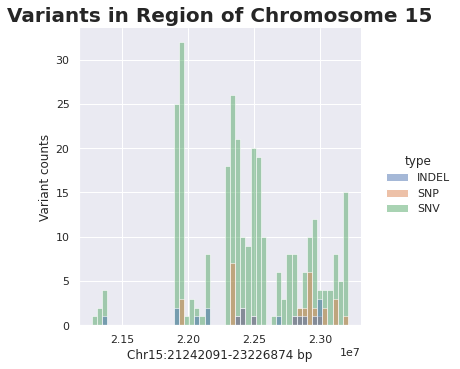

In [16]:
# Create a plot with the results:

sns.set_theme(style="darkgrid")
sns.color_palette('deep')
sns.displot(data=df, hue='type', hue_order=['INDEL','SNP','SNV'], x="start", bins=50) # multiple= "dodge", 'stack'
plt.title('Variants in Region of Chromosome 15', fontsize=20, fontweight='bold' )
plt.xlabel('Chr15:21242091-23226874 bp', fontsize=12)
plt.ylabel('Variant counts', fontsize=12)
sns.despine(left=False)
plt.show()

**Situation:** I am interested in getting a list of all participants in the study, that have:
(A) SNVs in NOD2 gene that have MAF of <0.01 in gnomad_NFE AND are missense, start_lost, stop_gained, or stop_lost
split by hets and homs.

- How I can submit this query but instead of NOD2, for a list of 10 genes (example list: IL3, IL31, IL32, IL34, IL6, IL6R, IL10RA, IL10RB,  IL7, IL7R) to the openCGA server

In [30]:
# Define the parameters of the variants we want to query

genes = ['NOD2','IL3']
limit = 5
type = ['SNV']
ct = ['missense_variant','start_lost','stop_gained','stop_lost'] #List of SO consequence types, e.g. missense_variant,stop_lost or SO:0001583,SO:0001578
populationFrequencyMaf='gnomAD:ALL<0.01'



In [31]:
variants = variant_client.query(study=study, gene=genes, type=type, ct=ct, 
                                populationFrequencyMaf=populationFrequencyMaf, limit=limit) 


variants.print_results('id')
#pprint(variants.get_result(0))


#Time: 460
#Num matches: 1
#Num results: 1
#Num inserted: 0
#Num updated: 0
#Num deleted: 0
#id
16:50744624:C:T
